# Example for categorical ALE plots

In [1]:
import sys
project_path = "/".join(sys.path[0].split("/")[:-1])
sys.path.append(project_path)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from ale.ale.ale import ALE
from ale.utils.data_operations import get_mids

Download data from: https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike.csv

In [2]:
data = pd.read_csv("../datasets/bike.csv")
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4


In [3]:
X = data.loc[:, ~data.columns.isin(["cnt", "yr", "days_since_2011"])]
feature_names = X.columns
X = X.to_numpy()
y = data["cnt"]
target_name = "cnt"
y = y.to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

One hot encoding for categorical features

This is especially important as we don't want to bias the model by introducing different distances between categorical features

In [5]:
encoder = OneHotEncoder()
encoder.fit(X_train[:, :6])

def encode_features(data):
    categorical = data[:, :6]
    encoded = encoder.transform(categorical).toarray()
    continuous = data[:, 6:].astype(float)
    concat = np.concatenate([encoded, continuous], axis=1)
    return concat.astype(float)




In [6]:
class BikeRentalPredictor:
    def __init__(self) -> None:
        self.model = RandomForestRegressor()

    def fit(self, X, y):
        X_encoded = encode_features(X)
        self.model.fit(X_encoded, y)

    def predict(self, X):
        X_encoded = encode_features(X)
        y_pred = self.model.predict(X_encoded)
        return y_pred

In [7]:
model = BikeRentalPredictor()
model.fit(X_train, y_train)

Text(0.5, 0, 'ground truth')

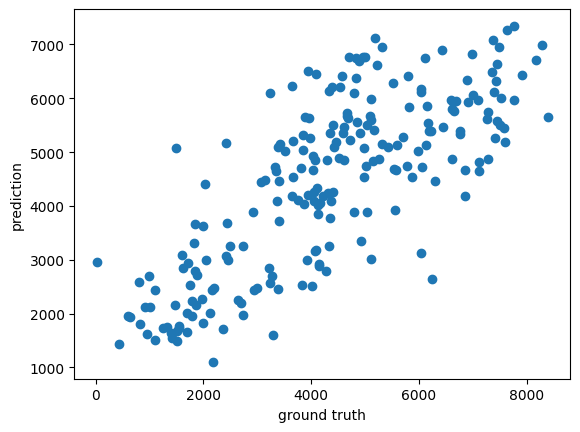

In [8]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_ylabel("prediction")
ax.set_xlabel("ground truth")

## Multiple models

### Train

In [9]:
num_models = 50

In [10]:
models = []
for _ in range(num_models):
    model = BikeRentalPredictor()
    model.fit(X_train, y_train)

    models.append(model)

In [11]:
ale = ALE(models, centered=False)

0it [00:00, ?it/s]

50it [00:03, 15.80it/s]


Text(0, 0.5, 'ale')

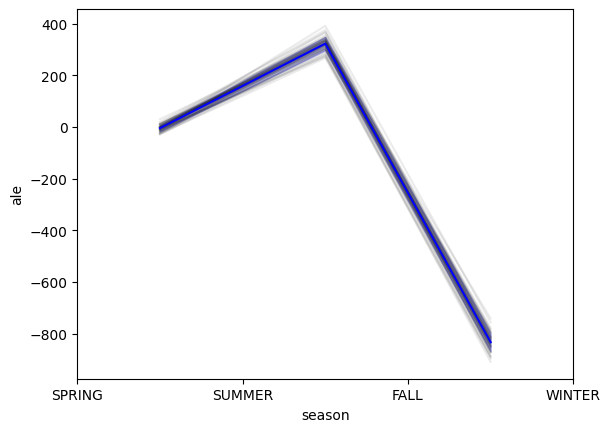

In [20]:
order = np.array(["SPRING", "SUMMER", "FALL", "WINTER"])
fig, ax = plt.subplots()

scores, bins = ale(X_test, [0], order=order)
ax.plot(range(len(order) - 1), scores.T, color="k", alpha=4/num_models)
mean = np.mean(scores, axis=0)
std = np.std(scores, axis=0)
ax.plot(range(len(order) - 1), mean, color="b")
ax.fill_between(range(len(order) - 1), mean - std, mean + std, color="b", alpha=0.2)
ax.set_xticks(np.linspace(-0.5, len(order) - 1.5, len(order)))
ax.set_xticklabels(order)
ax.set_xlabel("season")
ax.set_ylabel("ale")

50it [00:09,  5.34it/s]


Text(0, 0.5, 'ale')

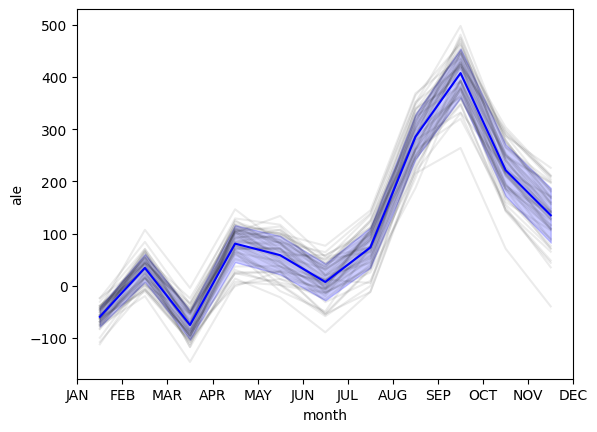

In [21]:
order = np.array([ 'JAN', 'FEB', 'MAR', 'APR',  'MAY', 'JUN', 'JUL', 'AUG',  'SEP', 'OCT', 'NOV', 'DEC'])
fig, ax = plt.subplots()

scores, bins = ale(X_test, [1], order=order)
ax.plot(range(len(order) - 1), scores.T, color="k", alpha=4/num_models)
mean = np.mean(scores, axis=0)
std = np.std(scores, axis=0)
ax.plot(range(len(order) - 1), mean, color="b")
ax.fill_between(range(len(order) - 1), mean - std, mean + std, color="b", alpha=0.2)

ax.set_xticks(np.linspace(-0.5, len(order) - 1.5, len(order)))
ax.set_xticklabels(order)
ax.set_xlabel("month")
ax.set_ylabel("ale")

50it [00:06,  7.74it/s]


Text(0, 0.5, 'ale')

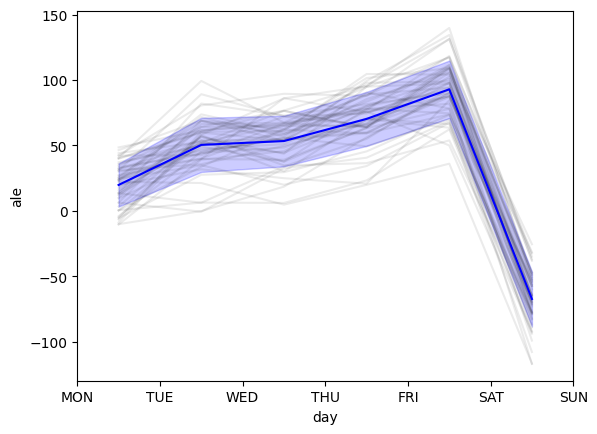

In [22]:
order = np.array(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
fig, ax = plt.subplots()

scores, bins = ale(X_test, [3], order=order)
ax.plot(range(len(order) - 1), scores.T, color="k", alpha=4/num_models)
mean = np.mean(scores, axis=0)
std = np.std(scores, axis=0)
ax.plot(range(len(order) - 1), mean, color="b")
ax.fill_between(range(len(order) - 1), mean - std, mean + std, color="b", alpha=0.2)

ax.set_xticks(np.linspace(-0.5, len(order) - 1.5, len(order)))
ax.set_xticklabels(order)
ax.set_xlabel("day")
ax.set_ylabel("ale")

0it [00:00, ?it/s]

50it [00:02, 18.88it/s]


Text(0, 0.5, 'ale')

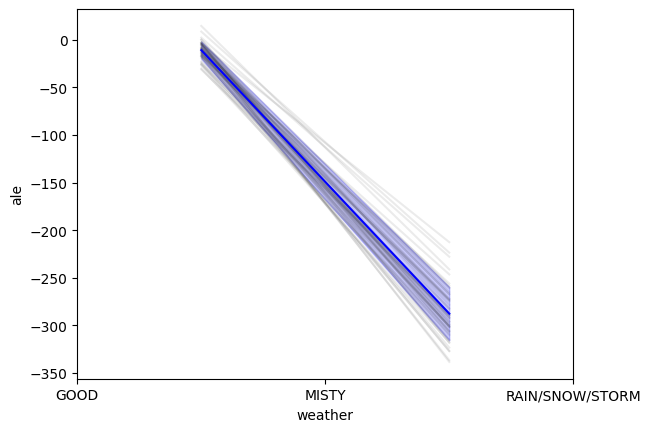

In [23]:
order = np.array(['GOOD', 'MISTY', 'RAIN/SNOW/STORM'])
fig, ax = plt.subplots()

scores, bins = ale(X_test, [5], order=order)
ax.plot(range(len(order) - 1), scores.T, color="k", alpha=4/num_models)
mean = np.mean(scores, axis=0)
std = np.std(scores, axis=0)
ax.plot(range(len(order) - 1), mean, color="b")
ax.fill_between(range(len(order) - 1), mean - std, mean + std, color="b", alpha=0.2)

ax.set_xticks(np.linspace(-0.5, len(order) - 1.5, len(order)))
ax.set_xticklabels(order)
ax.set_xlabel("weather")
ax.set_ylabel("ale")

0it [00:00, ?it/s]

50it [00:08,  5.78it/s]
50it [00:08,  5.62it/s]
50it [00:09,  5.51it/s]


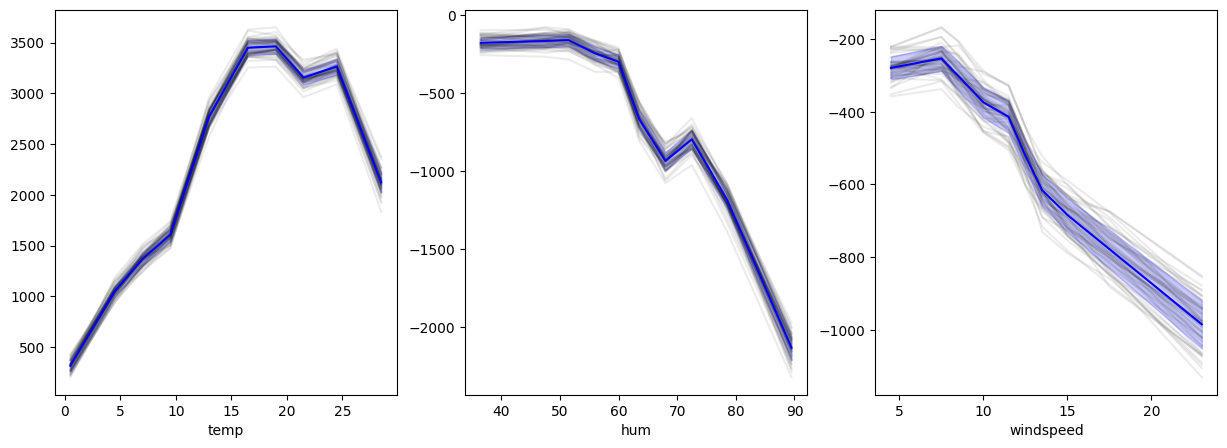

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for idx, (column_name, ax) in enumerate(zip(feature_names[-3:], axs.flatten())):
    scores, bins = ale(X_test, columns=[6 + idx])

    mids = get_mids(bins)
    ax.plot(mids, scores.T, c="k", alpha=4/num_models)
    mean = np.mean(scores, axis=0)
    std = np.std(scores, axis=0)
    ax.plot(mids, mean, color="b")
    ax.fill_between(mids, mean - std, mean + std, color="b", alpha=0.2)

    ax.set_xlabel(column_name)

In [17]:
a = np.arange(10)

list(filter(lambda x: isinstance(x, str), a))
bool([])

False